In [3]:
# pylab for matplotlib
%pylab inline
%matplotlib inline

import os  
import numpy as np  

# Import the `pandas` library as `pd`
import pandas as pd  
import statsmodels.api as sm  
import seaborn as sb  
sb.set_style('darkgrid')

# load time series modules
from pandas import Series, DataFrame
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

Populating the interactive namespace from numpy and matplotlib
scipy: 0.19.1
sklearn: 0.19.0


In [5]:
# Load in the data with `read_csv()`
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
stock = pd.read_csv("stock.csv", parse_dates=['Date'], index_col='Date', date_parser=dateparse)
stock

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
1950-01-06,16.980000,16.980000,16.980000,16.980000,16.980000,2010000
1950-01-09,17.090000,17.090000,17.080000,17.080000,17.080000,3850000
1950-01-10,17.030001,17.030001,17.030001,17.030001,17.030001,2160000
1950-01-11,17.090000,17.090000,17.090000,17.090000,17.090000,2630000
1950-01-12,16.760000,16.760000,16.760000,16.760000,16.760000,2970000
1950-01-13,16.670000,16.670000,16.670000,16.670000,16.670000,3330000


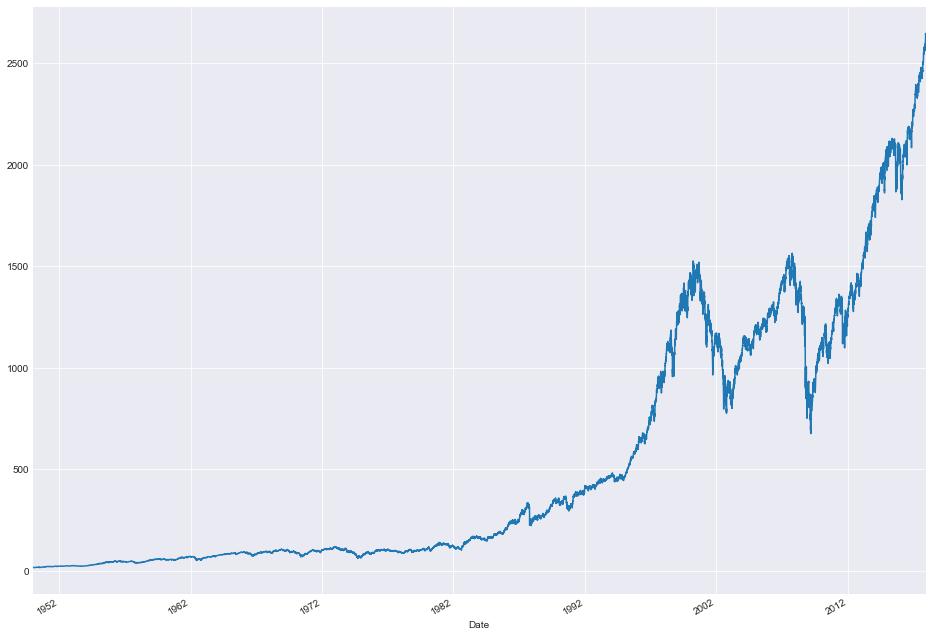

In [6]:
stock['Close'].plot(figsize=(16, 12))

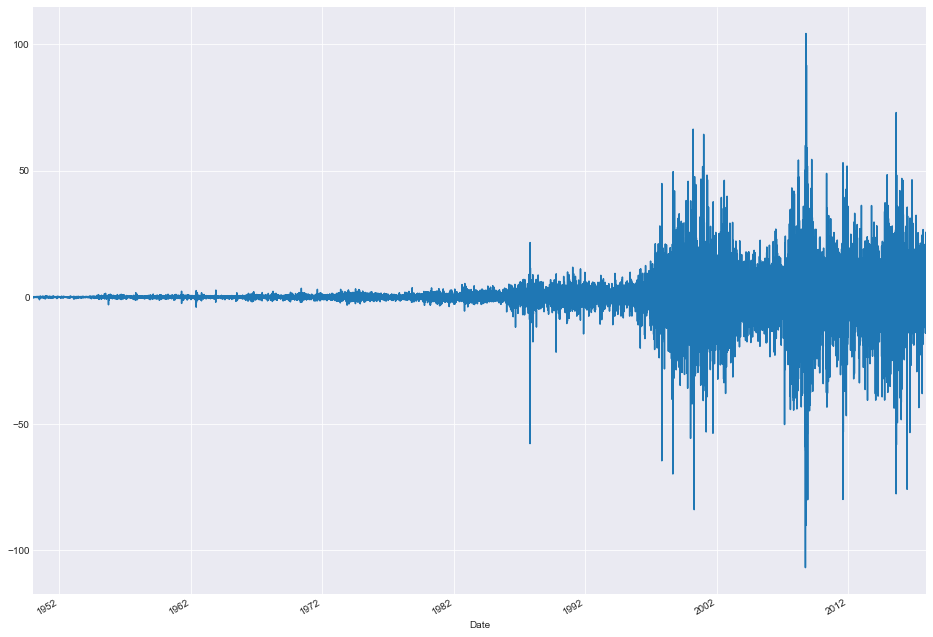

In [7]:
# First difference
stock['First Difference'] = stock['Close'] - stock['Close'].shift()  
stock['First Difference'].plot(figsize=(16, 12))

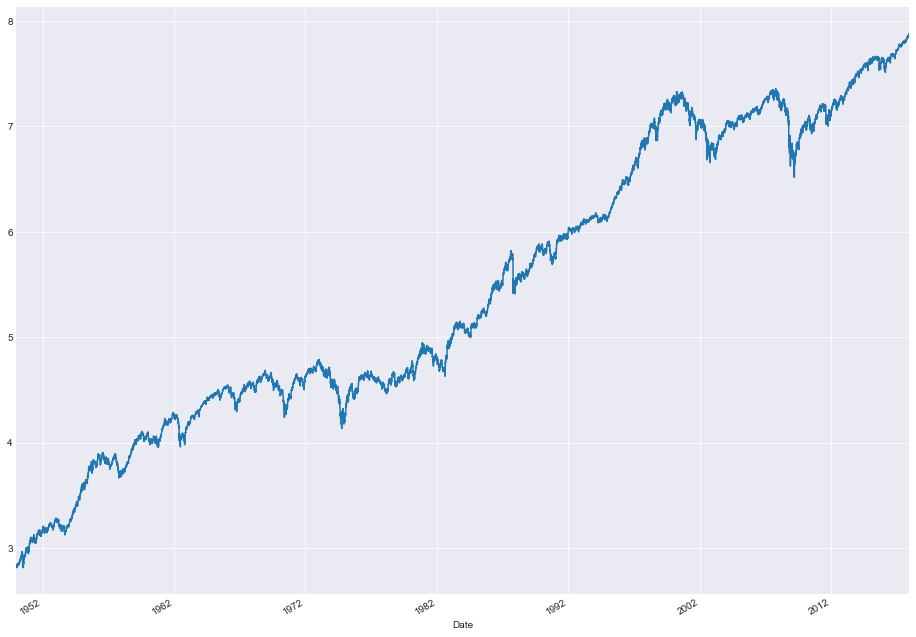

In [8]:
# so much variance
stock['Natural Log'] = stock['Close'].apply(lambda x: np.log(x))  
stock['Natural Log'].plot(figsize=(16, 12))

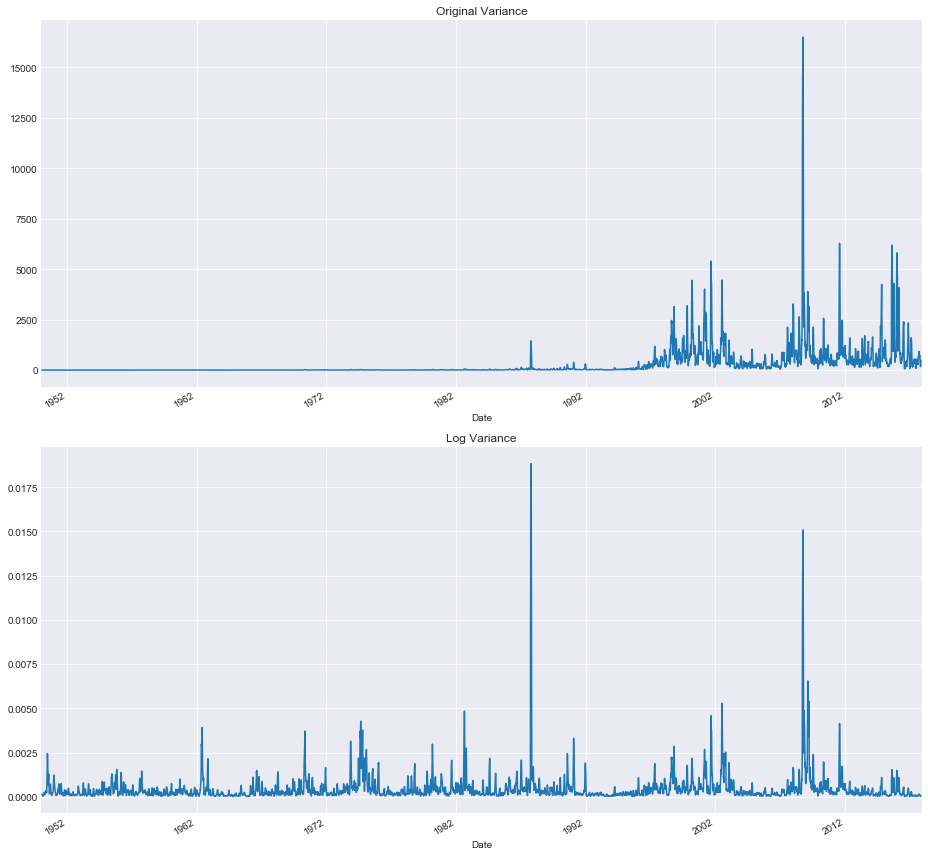

In [13]:
# comparing original and log variances
close = Series(stock['Close'], index = stock.index)
close_log = Series(stock['Natural Log'], index = stock.index)
stock['Original Variance'] = close.rolling(window=30, min_periods=None, freq=None, center=True).var()
stock['Log Variance'] = close_log.rolling(window=30, min_periods=None, freq=None, center=True).var()

fig, ax = plt.subplots(2, 1, figsize=(13, 12))  
stock['Original Variance'].plot(ax=ax[0], title='Original Variance')  
stock['Log Variance'].plot(ax=ax[1], title='Log Variance')  
fig.tight_layout()

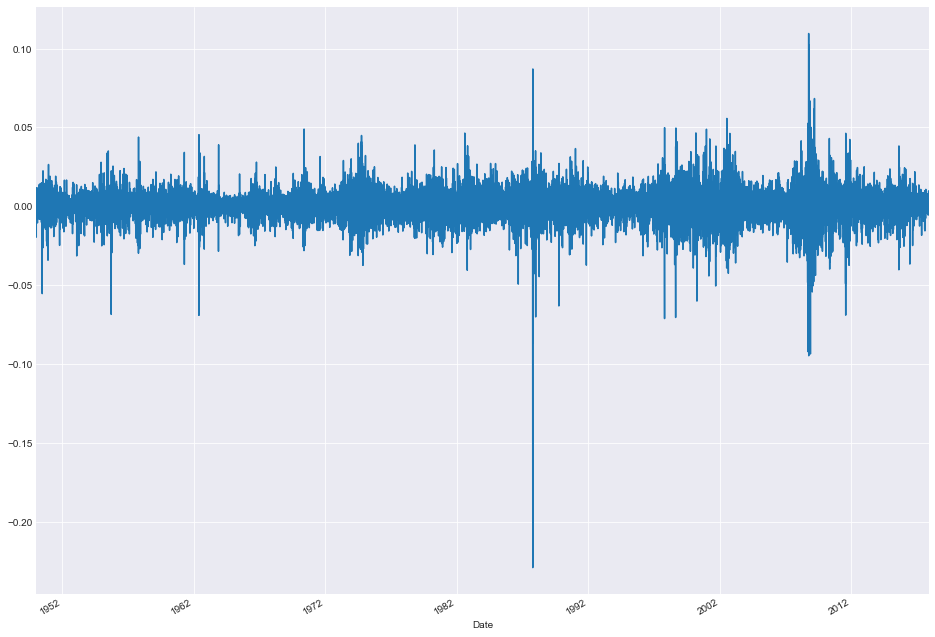

In [14]:
stock['Logged First Difference'] = close_log - close_log.shift()  
stock['Logged First Difference'].plot(figsize=(16, 12))  

In [15]:
stock['Lag 1'] = stock['Logged First Difference'].shift()  
stock['Lag 2'] = stock['Logged First Difference'].shift(2)  
stock['Lag 5'] = stock['Logged First Difference'].shift(5)  
stock['Lag 30'] = stock['Logged First Difference'].shift(30)

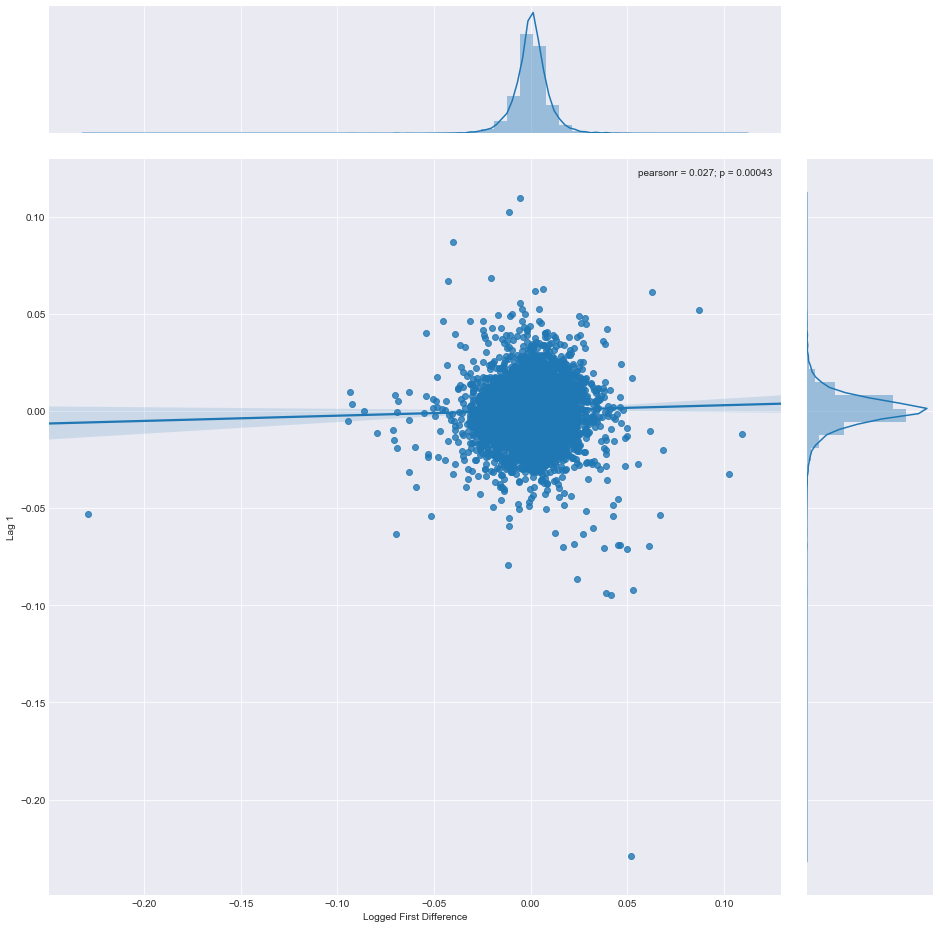

In [17]:
sb.jointplot('Logged First Difference', 'Lag 1', stock, kind='reg', size=13)

In [18]:
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf

lag_correlations = acf(stock['Logged First Difference'].iloc[1:])  
lag_partial_correlations = pacf(stock['Logged First Difference'].iloc[1:])

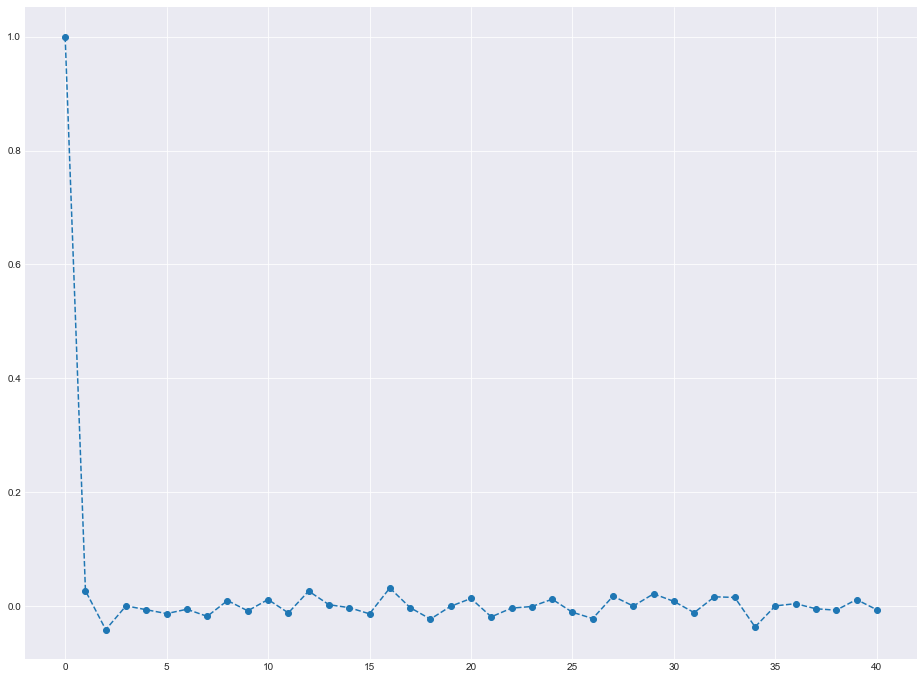

In [19]:
fig, ax = plt.subplots(figsize=(16,12))  
ax.plot(lag_correlations, marker='o', linestyle='--')

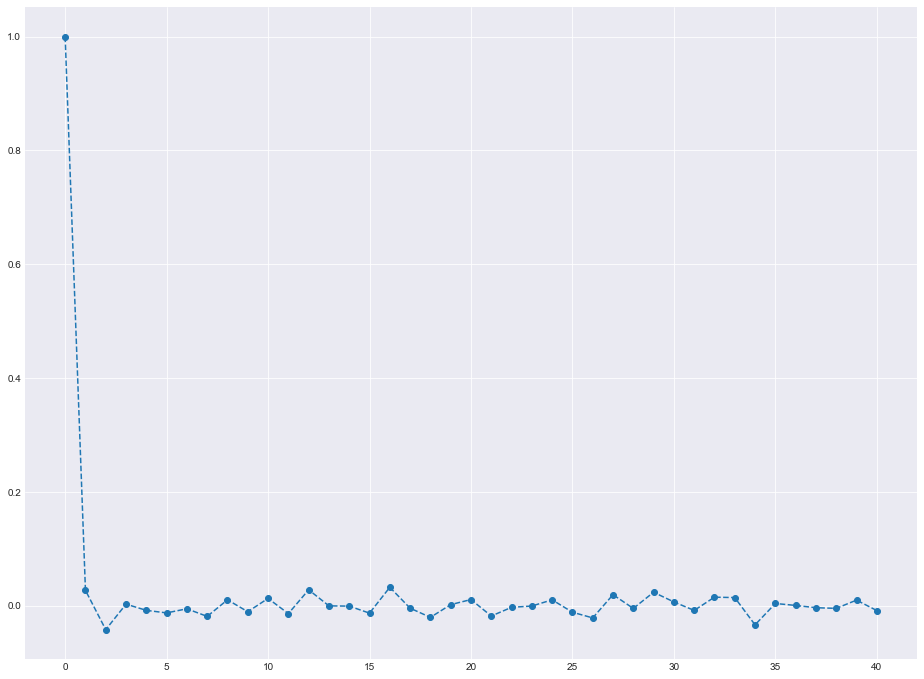

In [24]:
fig, ax = plt.subplots(figsize=(16,12))  
ax.plot(lag_partial_correlations, marker='o', linestyle='--')

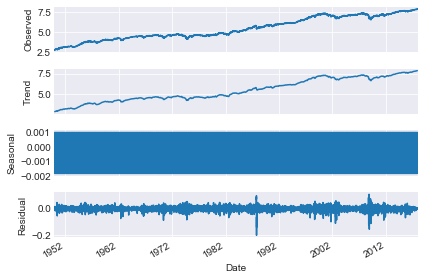

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(stock['Natural Log'], model='additive', freq=30)  
fig = plt.figure()  
fig = decomposition.plot()

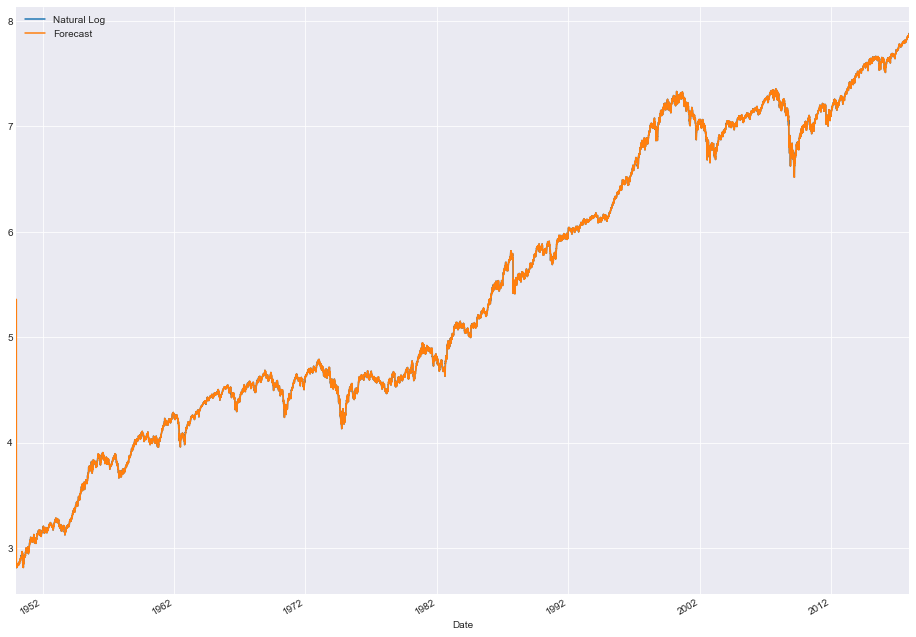

In [21]:
model = sm.tsa.ARIMA(stock['Natural Log'].iloc[1:], order=(1, 0, 0))  
results = model.fit(disp=-1)  
stock['Forecast'] = results.fittedvalues  
stock[['Natural Log', 'Forecast']].plot(figsize=(16, 12))

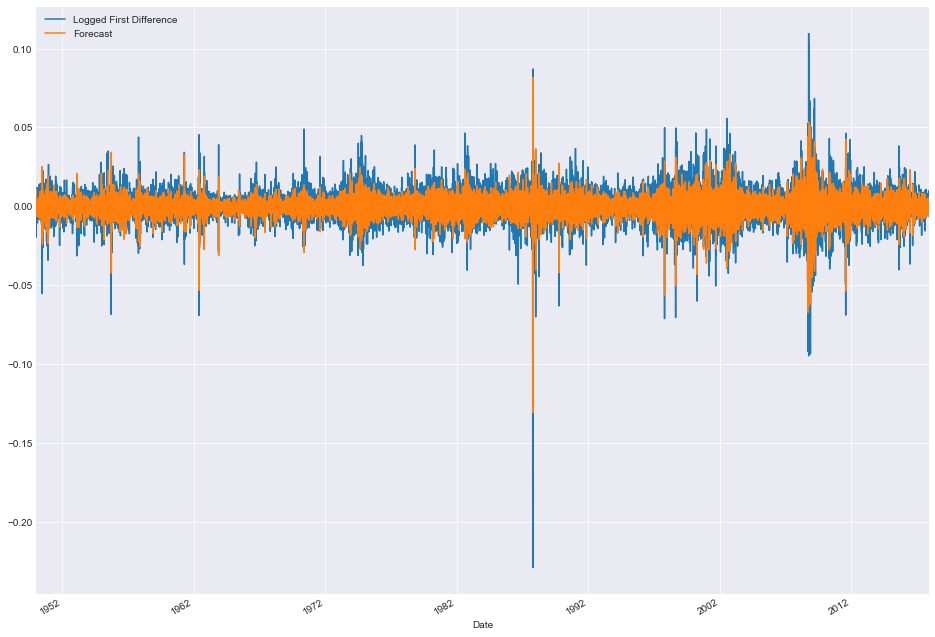

In [23]:
model = sm.tsa.ARIMA(stock['Logged First Difference'].iloc[1:], order=(1, 1, 0))  
results = model.fit(disp=-1)  
stock['Forecast'] = results.fittedvalues  
stock[['Logged First Difference', 'Forecast']].plot(figsize=(16, 12))